# ⚽ English Football Wage-Performance Modelling: Optimisation & Application
**Leagues:** Premier League & Championship (2013–2025)  
**Author:** [Victoria Friss de Kereki](https://www.linkedin.com/in/victoria-friss-de-kereki/)  
**Medium Article:** [Beyond Spending: How Efficient Are English Football Clubs?](https://medium.com/@vickyfrissdekereki/beyond-spending-how-efficient-are-english-football-clubs-a518b0378867)

**Notebook first created:** `15/01/2026`  
**Last updated:** `19/01/2026`  

---

## Purpose
This notebook investigates the relationship between English football clubs’ wage expenditures and their league performance. Using **log–quadratic regression models**, it explores the **diminishing returns of spending** and identifies patterns in team performance.

The workflow is divided into two stages:

1. **Model Optimisation:**  
   Fit and compare multiple regression models to determine the best predictor of performance from wage spending, focusing on **interpretability and robustness** rather than purely maximising statistical fit.

2. **Performance Benchmarking:**  
   Apply the best model to compute **expected performance** and **residuals**. This allows us to highlight **overperforming and underperforming clubs** each season, controlling for wage spending.

---

## Key Features
- Analyses **Premier League and Championship clubs** from 2013 to 2025.  
- Uses **log-linear and log–quadratic models** to capture nonlinear effects of spending.  
- Incorporates **season-normalised and rank-based wage measures** to make comparisons across years robust.  
- Produces **visualisations of predicted vs actual performance** and **residual distributions per season**.  
- Focused on generating actionable insights about **team efficiency and return on wage investment**.eturn on wage investment**.


<div style="text-align: left;">
    <img src="Images and others for Medium/English Football Wage-Performance Modelling Optimisation & Application.png" alt="English Football Wage-Performance Modelling Optimisation & Application" width="600">
</di>
>

## 1. Import packages

In [1]:
# Data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Machine learning / modeling
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Optional: set seaborn style for all plots
sns.set(style="whitegrid")

## 2. Load CSV

In [2]:
df = pd.read_csv("wage-performance data.csv")
df.tail()

,position,team,gp,pts,season,league,league_level,pts_per_game,Gross_PY_GBP,Adj_Gross_GBP,pyramid_position,pts_absolute,Adj_Gross_GBP_z,pts_absolute_z,pyramid_position_z
523,20,Preston North End,46,50,2024-2025,Championship,2,1.086957,14354800.0,14354800.0,40,50,-0.732854,-1.132417,1.378124
524,21,Hull City,46,49,2024-2025,Championship,2,1.065217,23694400.0,23694400.0,41,49,-0.544819,-1.155784,1.456874
525,22,Luton Town,46,49,2024-2025,Championship,2,1.065217,27716000.0,27716000.0,42,49,-0.463852,-1.155784,1.535624
526,23,Plymouth Argyle,46,46,2024-2025,Championship,2,1.000000,12313600.0,12313600.0,43,46,-0.773950,-1.225885,1.614373
527,24,Cardiff City,46,44,2024-2025,Championship,2,0.956522,23506000.0,23506000.0,44,44,-0.548613,-1.272619,1.693123


In [3]:
# Keep only the first 12 columns
df = df.iloc[:, :12]

# Quick check
df.head()

,position,team,gp,pts,season,league,league_level,pts_per_game,Gross_PY_GBP,Adj_Gross_GBP,pyramid_position,pts_absolute
0,1,Manchester City,38,86,2013-2014,Premier League,1,2.263158,113952000.0,147132001.0,1,175
1,2,Liverpool,38,84,2013-2014,Premier League,1,2.210526,65562600.0,84652806.0,2,173
2,3,Chelsea,38,82,2013-2014,Premier League,1,2.157895,105912000.0,136750953.0,3,171
3,4,Arsenal,38,79,2013-2014,Premier League,1,2.078947,73670800.0,95121913.0,4,168
4,5,Everton,38,72,2013-2014,Premier League,1,1.894737,52856800.0,68247394.0,5,161


## 3. Use model created in [Wage-Performance Relationship in English Football (2013-2025).ipynb](https://github.com/vickyfriss/Football-analytics/blob/main/202601%20-%204%20-%20Wage-Performance%20Relationship%20in%20English%20Football%20(2013-2025).ipynb) to calculate expected points and residuals.

In [4]:
# Step 2: Define the prediction function
INTERCEPT = 402.8828232111315
B1 = -75.52443902274617      # log(wage)
B2 = 3.337091313790353       # log(wage)^2

def predict_points(wage):
    lw = np.log(wage)
    return INTERCEPT + B1 * lw + B2 * (lw ** 2)

In [5]:
# Step 3: Compute expected points and residuals
df1 = df.copy()
df1['expected_points'] = df1['Adj_Gross_GBP'].apply(predict_points)
df1['residual'] = df1['pts_absolute'] - df1['expected_points']  # actual - expected

In [6]:
# Step 4: Quick check
df1[['team', 'season', 'pts_absolute', 'Adj_Gross_GBP', 'expected_points', 'residual']]

,team,season,pts_absolute,Adj_Gross_GBP,expected_points,residual
0,Manchester City,2013-2014,175,147132001.0,162.826774,12.173226
1,Liverpool,2013-2014,173,84652806.0,136.210144,36.789856
2,Chelsea,2013-2014,171,136750953.0,159.186507,11.813493
3,Arsenal,2013-2014,168,95121913.0,141.654910,26.345090
4,Everton,2013-2014,161,68247394.0,126.389692,34.610308
...,...,...,...,...,...,...
523,Preston North End,2024-2025,50,14354800.0,64.548073,-14.548073
524,Hull City,2024-2025,49,23694400.0,82.657679,-33.657679
525,Luton Town,2024-2025,49,27716000.0,88.666926,-39.666926
526,Plymouth Argyle,2024-2025,46,12313600.0,59.340583,-13.340583


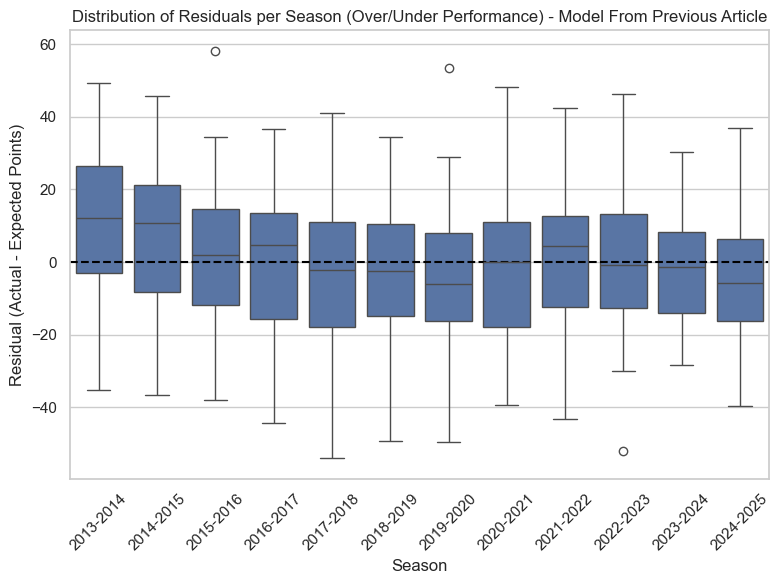

In [71]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Boxplot of residuals per season
sns.boxplot(data=df1, x='season', y='residual')

plt.title('Distribution of Residuals per Season (Over/Under Performance) - Model From Previous Article')
plt.xlabel('Season')
plt.ylabel('Residual (Actual - Expected Points)')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

##### As shown in the boxplot above, the 2013-2014 and 2014-2015 seasons clearly exhibit lower wage spending and a higher number of clubs appearing to over-perform relative to their wages. This unusual pattern is why I decided to explore different model specifications to identify the approach that best captures the wage–performance relationship while remaining interpretable and aligned with real-world spending behaviour.

## 4. Estimate and apply new models

### 4.1 Build model excluding 2013-2014 and 2014-2015 seasons

R-squared: 0.8046
RMSE: 18.90
Intercept: 544.674048
Coef for log(wage): -91.822490
Coef for log(wage)^2: 3.798382


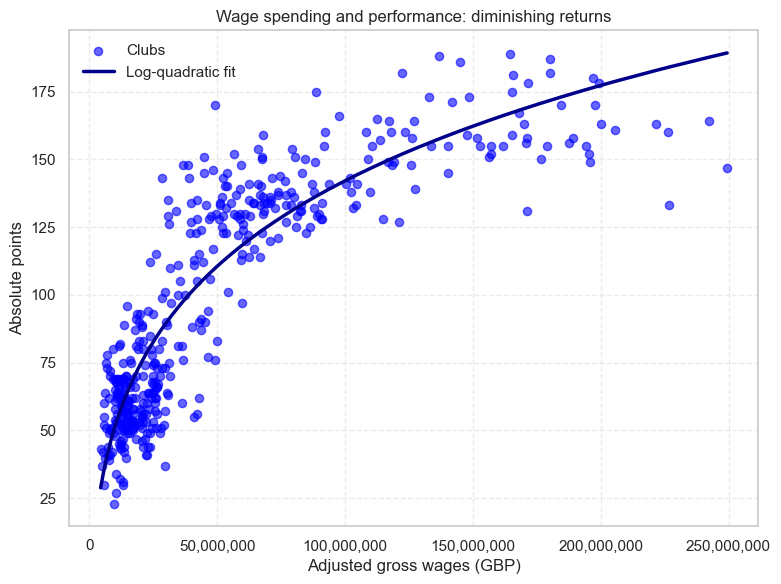

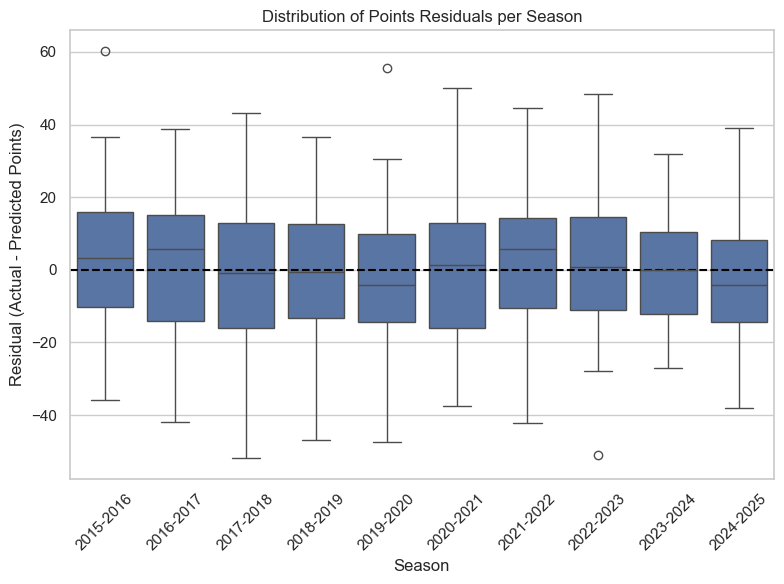

In [78]:
sns.set(style="whitegrid")

# Exclude the first two seasons and create a new DataFrame
excluded_seasons = ['2013-2014', '2014-2015']
df_filtered = df.loc[~df['season'].isin(excluded_seasons)].copy()

# Quick check
df_filtered['season'].unique()

# Prepare data
X_log = np.log(df_filtered["Adj_Gross_GBP"].values).reshape(-1, 1)
y = df_filtered["pts_absolute"].values

# Fit log-quadratic model
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_log, y)

# Predictions
y_pred = poly_model.predict(X_log)

# Add predictions and residuals to the dataframe
df_filtered['pts_pred'] = y_pred
df_filtered['pts_residual'] = df_filtered['pts_absolute'] - df_filtered['pts_pred']

# Model statistics
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"R-squared: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# Extract coefficients
linear_model = poly_model.named_steps['linearregression']
coefficients = linear_model.coef_
intercept = linear_model.intercept_
print(f"Intercept: {intercept:.6f}")
print(f"Coef for log(wage): {coefficients[1]:.6f}")
print(f"Coef for log(wage)^2: {coefficients[2]:.6f}")

# 7. Plot fitted curve
sorted_idx = np.argsort(df_filtered["Adj_Gross_GBP"].values)
X_sorted = df_filtered["Adj_Gross_GBP"].values[sorted_idx]
y_poly_sorted = y_pred[sorted_idx]

plt.figure(figsize=(8, 6))

# Scatter points
plt.scatter(
    df_filtered["Adj_Gross_GBP"],
    df_filtered["pts_absolute"],
    color="blue",
    alpha=0.6,
    s=35,
    label="Clubs",
)

# Fitted curve
plt.plot(
    X_sorted,
    y_poly_sorted,
    color="darkblue",
    linewidth=2.5,
    label="Log-quadratic fit",
)

# Axis formatting
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.xlabel("Adjusted gross wages (GBP)")
plt.ylabel("Absolute points")
plt.title("Wage spending and performance: diminishing returns")
plt.legend(frameon=False)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# 8. Boxplots of residuals per season
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=df_filtered,
    x='season',
    y='pts_residual'
)

plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("Residual (Actual - Predicted Points)")
plt.title("Distribution of Points Residuals per Season")
plt.tight_layout()
plt.show()

##### After excluding the 2013-2014 and 2014-2015 seasons, the residuals are now more evenly distributed across seasons. Most seasons have medians close to zero, indicating that the model’s expected points align well with actual performance and that over- and under-performance is more balanced.

### 4.2 Build model scaling gross wages per season

In [9]:
# Copy dataframe to avoid overwriting
df_scaled = df.copy()

# Scale wages per season: top = 100, others proportional
df_scaled['Adj_Gross_GBP_scaled'] = df_scaled.groupby('season')['Adj_Gross_GBP'].transform(
    lambda x: x / x.max() * 100
)

# Quick check
df_scaled[['season', 'team', 'Adj_Gross_GBP', 'Adj_Gross_GBP_scaled']].head(10)

,season,team,Adj_Gross_GBP,Adj_Gross_GBP_scaled
0,2013-2014,Manchester City,147132001.0,100.000000
1,2013-2014,Liverpool,84652806.0,57.535278
2,2013-2014,Chelsea,136750953.0,92.944398
3,2013-2014,Arsenal,95121913.0,64.650730
4,2013-2014,Everton,68247394.0,46.385146
5,2013-2014,Tottenham Hotspur,70514439.0,47.925970
6,2013-2014,Manchester United,125621023.0,85.379810
7,2013-2014,Southampton,35946835.0,24.431690
8,2013-2014,Stoke City,43805704.0,29.773063
9,2013-2014,Newcastle United,47070570.0,31.992068


In [10]:
# Prepare data
X_log_scaled = np.log(df_scaled['Adj_Gross_GBP_scaled'] + 1e-6).values.reshape(-1, 1)  # small epsilon to avoid log(0)
y = df_scaled['pts_absolute'].values

# Polynomial regression (degree 2)
poly_model_scale = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model_scale.fit(X_log_scaled, y)

# Predictions
y_pred_scale = poly_model_scale.predict(X_log_scaled)

# Add predictions and residuals
df_scaled['pts_pred_scaled'] = y_pred_scale
df_scaled['pts_residual_scaled'] = df_scaled['pts_absolute'] - df_scaled['pts_pred_scaled']

# Model statistics

r2_scaled = r2_score(y, y_pred_scale)
rmse_scaled = np.sqrt(mean_squared_error(y, y_pred_scale))
print(f"R-squared (scaled wages): {r2_scaled:.4f}")
print(f"RMSE (scaled wages): {rmse_scaled:.2f}")


R-squared (scaled wages): 0.7932
RMSE (scaled wages): 19.46


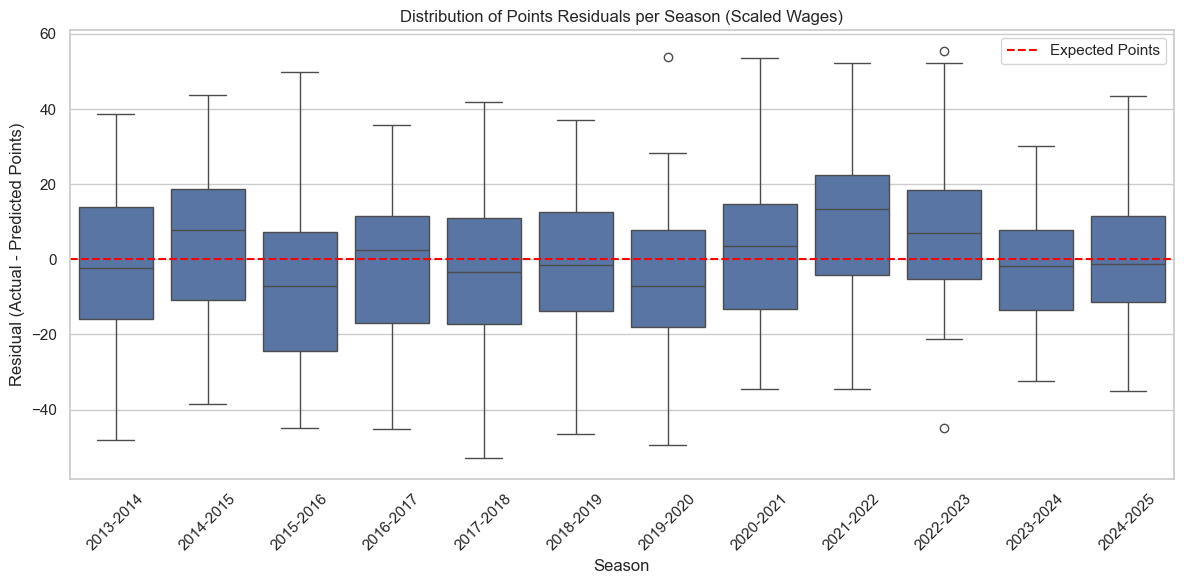

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_scaled, x='season', y='pts_residual_scaled')
plt.axhline(0, color='red', linestyle='--', label='Expected Points')
plt.xticks(rotation=45)
plt.xlabel("Season")
plt.ylabel("Residual (Actual - Predicted Points)")
plt.title("Distribution of Points Residuals per Season (Scaled Wages)")
plt.legend()
plt.tight_layout()
plt.show()


### 4.3 Spending ranking

In [12]:
# Copy dataframe to avoid overwriting
df_ranked = df.copy()

# Rank within each season: 1 = top spender, largest wage
df_ranked['spending_rank'] = df_ranked.groupby('season')['Adj_Gross_GBP'] \
                                      .rank(ascending=False, method='first')

# Quick check
df_ranked[['season', 'team', 'Adj_Gross_GBP', 'spending_rank']].head(10)


,season,team,Adj_Gross_GBP,spending_rank
0,2013-2014,Manchester City,147132001.0,1.0
1,2013-2014,Liverpool,84652806.0,5.0
2,2013-2014,Chelsea,136750953.0,2.0
3,2013-2014,Arsenal,95121913.0,4.0
4,2013-2014,Everton,68247394.0,7.0
5,2013-2014,Tottenham Hotspur,70514439.0,6.0
6,2013-2014,Manchester United,125621023.0,3.0
7,2013-2014,Southampton,35946835.0,18.0
8,2013-2014,Stoke City,43805704.0,13.0
9,2013-2014,Newcastle United,47070570.0,11.0


In [13]:
# Prepare predictor and target
X_rank = df_ranked['spending_rank'].values.reshape(-1, 1)
y = df_ranked['pts_absolute'].values

# Polynomial regression degree 2
poly_rank_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_rank_model.fit(X_rank, y)

# Predictions
y_pred_rank = poly_rank_model.predict(X_rank)

# Add to dataframe
df_ranked['pts_pred_rank'] = y_pred_rank
df_ranked['pts_residual_rank'] = df_ranked['pts_absolute'] - df_ranked['pts_pred_rank']

# Model statistics
r2_rank = r2_score(y, y_pred_rank)
rmse_rank = np.sqrt(mean_squared_error(y, y_pred_rank))
print(f"R-squared (rank model): {r2_rank:.4f}")
print(f"RMSE (rank model): {rmse_rank:.2f}")

# Extract coefficients
linear_model_rank = poly_rank_model.named_steps['linearregression']
coeffs_rank = linear_model_rank.coef_
intercept_rank = linear_model_rank.intercept_
print(f"Intercept: {intercept_rank:.6f}")
print(f"Coef for rank: {coeffs_rank[1]:.6f}")
print(f"Coef for rank^2: {coeffs_rank[2]:.6f}")


R-squared (rank model): 0.8107
RMSE (rank model): 18.62
Intercept: 180.798110
Coef for rank: -4.946446
Coef for rank^2: 0.043384


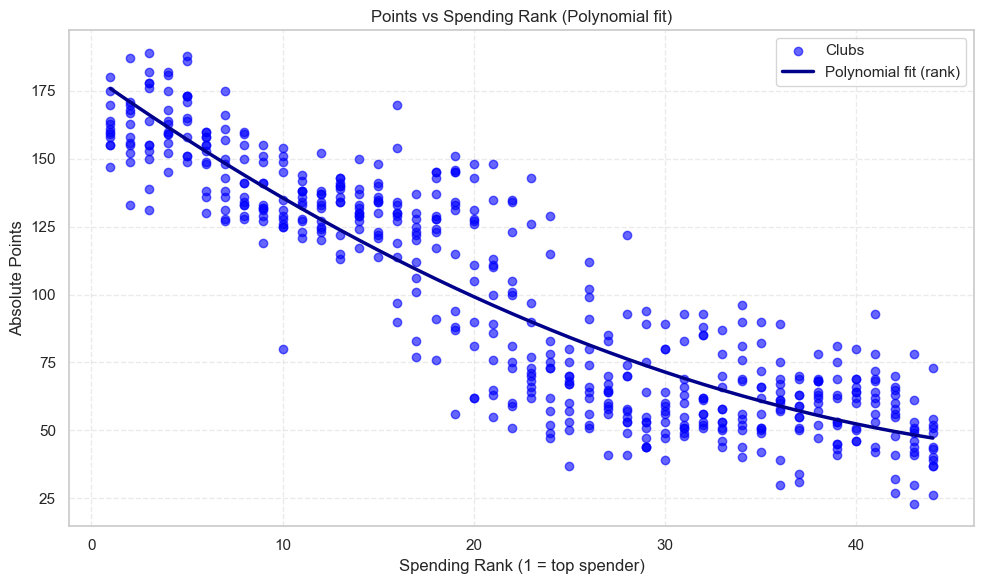

In [14]:
# Sort for smooth line
sorted_idx = np.argsort(df_ranked['spending_rank'])
X_sorted = df_ranked['spending_rank'].values[sorted_idx]
y_sorted = y_pred_rank[sorted_idx]

plt.figure(figsize=(8, 6))
plt.scatter(df_ranked['spending_rank'], df_ranked['pts_absolute'], alpha=0.6, color='blue', label='Clubs')
plt.plot(X_sorted, y_sorted, color='darkblue', linewidth=2.5, label='Polynomial fit (rank)')
plt.xlabel('Spending Rank (1 = top spender)')
plt.ylabel('Absolute Points')
plt.title('Points vs Spending Rank (Polynomial fit)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


## 5. Calculate and analyse expected points and residuals using model that excludes 2013-2014 and 2014-2015 seasons

> **Note:** I focus on the log–quadratic model built on actual wage bills, excluding the 2013-2014 and 2014-2015 seasons. These early seasons exhibit spending patterns that differ from the rest of the sample, even after adjustment, and do not align well with the general wage–performance relationship observed in later years. Excluding them improves model stability and interpretability while maintaining a strong R². The log transformation captures proportional effects of spending, and the quadratic term reflects diminishing returns. Although the rank-based spending model shows a slightly higher R², using actual wages better represents real financial investment and provides more meaningful insights into over- and under-performance.


In [47]:
df_filtered.tail()

,position,team,gp,pts,season,league,league_level,pts_per_game,Gross_PY_GBP,Adj_Gross_GBP,pyramid_position,pts_absolute,pts_pred,pts_residual
523,20,Preston North End,46,50,2024-2025,Championship,2,1.086957,14354800.0,14354800.0,40,50,63.030023,-13.030023
524,21,Hull City,46,49,2024-2025,Championship,2,1.065217,23694400.0,23694400.0,41,49,80.707082,-31.707082
525,22,Luton Town,46,49,2024-2025,Championship,2,1.065217,27716000.0,27716000.0,42,49,86.628600,-37.628600
526,23,Plymouth Argyle,46,46,2024-2025,Championship,2,1.000000,12313600.0,12313600.0,43,46,58.001227,-12.001227
527,24,Cardiff City,46,44,2024-2025,Championship,2,0.956522,23506000.0,23506000.0,44,44,80.410545,-36.410545


In [33]:
# Pivot residuals: one column per season
residuals_by_season = (
    df_filtered
    .pivot_table(
        index='team',
        columns='season',
        values='pts_residual',
        aggfunc='mean'   # safe even if 1 row per team-season
    )
    .reset_index()
)

In [57]:
# Group by team and compute total and average residuals
team_residuals = (
    df_filtered
    .groupby('team')
    .agg(
        total_pts_absolute=('pts_absolute', 'sum'),
        total_pts_predicted=('pts_pred', 'sum'),
        total_pts_residual=('pts_residual', 'sum'),
        avg_pts_residual=('pts_residual', 'mean'),
        number_of_seasons=('pts_residual', 'count'),
        total_Adj_Gross_GBP=('Adj_Gross_GBP', 'sum')
    )
    .reset_index()
)

In [58]:
team_residuals_full = team_residuals.merge(
    residuals_by_season,
    on='team',
    how='left'
)

In [59]:
team_residuals_full = (
    team_residuals_full
    .sort_values(by='avg_pts_residual', ascending=False)
    .reset_index(drop=True)
)

In [80]:
team_residuals_full_filtered = (
    team_residuals_full[
        team_residuals_full['number_of_seasons'] >= 8
    ]
    .reset_index(drop=True)
)

team_residuals_full_filtered

,team,total_pts_absolute,total_pts_predicted,total_pts_residual,avg_pts_residual,number_of_seasons,total_Adj_Gross_GBP,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023,2023-2024,2024-2025
0,Burnley,1203,984.137905,218.862095,21.886210,10,3.842589e+08,18.708879,38.566327,43.076005,16.639594,30.529164,24.710694,19.205799,11.808142,10.921400,4.696092
1,Brentford,986,770.418009,215.581991,21.558199,10,2.434213e+08,13.117356,8.639586,10.925809,4.224334,9.688716,16.589124,44.600827,48.483602,20.300026,39.012610
2,Brighton & Hove Albion,1274,1069.132704,204.867296,20.486730,10,4.882244e+08,13.713907,21.281369,20.580412,12.805927,13.979142,10.933891,26.735294,45.000434,13.667120,26.169800
3,Sheffield United,774,629.088325,144.911675,18.113959,8,1.874028e+08,NaN,NaN,9.555594,27.785482,55.539537,31.024568,-8.230696,20.098329,8.800898,0.337963
4,AFC Bournemouth,1231,1094.563272,136.436728,13.643673,10,4.930851e+08,36.485342,31.674134,21.657133,12.509055,9.551811,-30.488375,-13.332705,16.727460,20.479036,31.173838
5,Liverpool,1691,1586.740986,104.259014,10.425901,10,1.409231e+09,-1.723729,17.204231,14.137433,25.448721,30.448652,-4.788924,13.667922,-12.965652,11.561449,11.268910
6,Newcastle United,1356,1254.589213,101.410787,10.141079,10,7.233860e+08,7.398126,-13.257700,26.346801,18.843007,3.272778,8.914775,7.206397,21.703581,12.899767,8.083256
7,Wolverhampton Wanderers,1179,1091.001611,87.998389,8.799839,10,5.229402e+08,-16.028088,-21.882753,11.390542,36.688637,30.127156,12.368505,16.532695,6.022355,14.732582,-1.953243
8,Leeds United,955,872.685865,82.314135,8.231413,10,3.094351e+08,-0.514128,14.589497,-16.012735,9.632057,10.701040,50.189513,25.895825,0.687342,-14.203039,1.348763
9,Tottenham Hotspur,1550,1472.605996,77.394004,7.739400,10,1.133675e+09,34.843692,38.710239,25.039350,14.151674,-5.315987,-13.425656,9.852755,-0.652126,-1.336738,-24.473198


In [62]:
df_filtered[df_filtered['team'] == 'Burnley']

,position,team,gp,pts,season,league,league_level,pts_per_game,Gross_PY_GBP,Adj_Gross_GBP,pyramid_position,pts_absolute,pts_pred,pts_residual
108,1,Burnley,46,93,2015-2016,Championship,2,2.021739,15606000.0,19875763.0,21,93,74.291121,18.708879
147,16,Burnley,38,40,2016-2017,Premier League,1,1.052632,24622000.0,30576444.0,16,129,90.433673,38.566327
182,7,Burnley,38,54,2017-2018,Premier League,1,1.421053,31928000.0,38760570.0,7,143,99.923995,43.076005
234,15,Burnley,38,40,2018-2019,Premier League,1,1.052632,43665000.0,52103661.0,15,129,112.360406,16.639594
273,10,Burnley,38,54,2019-2020,Premier League,1,1.421053,44210000.0,52237108.0,10,143,112.470836,30.529164
324,17,Burnley,38,39,2020-2021,Premier League,1,1.026316,36491000.0,42057423.0,17,128,103.289306,24.710694
369,18,Burnley,38,35,2021-2022,Premier League,1,0.921053,40830000.0,43603978.0,18,124,104.794201,19.205799
416,1,Burnley,46,101,2022-2023,Championship,2,2.195652,29618000.0,29618000.0,21,101,89.191858,11.808142
458,19,Burnley,38,24,2023-2024,Premier League,1,0.631579,40846000.0,40846000.0,19,113,102.078600,10.921400
505,2,Burnley,46,100,2024-2025,Championship,2,2.173913,34580000.0,34580000.0,22,100,95.303908,4.696092
